In [1]:
# ps2
import cv2
import numpy as np
import nbimporter
import util
from disparity_ssd import *
from disparity_ncorr import *

Importing Jupyter notebook from util.ipynb
Importing Jupyter notebook from disparity_ssd.ipynb
Importing Jupyter notebook from disparity_ncorr.ipynb


In [2]:
use_subsampling = True # for fast processing

Stereo correspondence using SSD template matching Input stereo image pair (L,R):


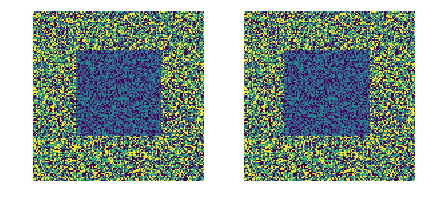

Disparity maps of the stereo image pair using SSD template matching:


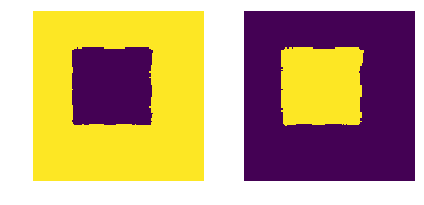

In [3]:

def ps2_1():
    L = util.read_img_gray_mode('pair0-L.png') * (1.0 / 255.0)  # grayscale, [0, 1]
    R = util.read_img_gray_mode('pair0-R.png') * (1.0 / 255.0)

    D_L = disparity_ssd(L, R, template_size=11)
    D_R = disparity_ssd(R, L, template_size=11)

    # normalize disparity maps
    (D_L, D_R) = util.normalize([D_L, D_R], 0, 255)

    util.write_img('ps2-1-a-1.png', D_L)
    util.write_img('ps2-1-a-2.png', D_R)

    print('Stereo correspondence using SSD template matching Input stereo image pair (L,R):')
    util.show_images_together(L, R)
    print('Disparity maps of the stereo image pair using SSD template matching:')
    util.show_images_together(D_L, D_R)
    
ps2_1()

Stereo correspondence using SSD template matching on real images Input stereo image pair:


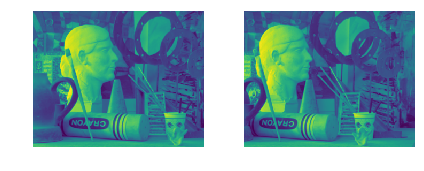

Disparity maps


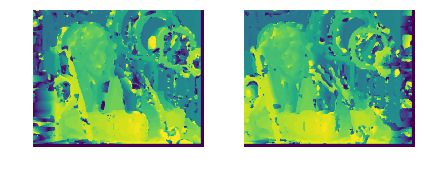

In [4]:
def ps2_2():
    L = util.read_img_gray_mode('pair1-L.png')
    R = util.read_img_gray_mode('pair1-R.png')

    if use_subsampling: (L, R) = util.downsample([L, R])
        
    # convert to [0,1] scale        
    L = L * (1.0 / 255.0)
    R = R * (1.0 / 255.0)

    ts = 7; dr = 100
    D_L = np.abs(disparity_ssd(L, R, template_size=ts, disparity_range=dr))
    D_R = np.abs(disparity_ssd(R, L, template_size=ts, disparity_range=dr))

    (D_L, D_R) = util.normalize([D_L, D_R], 0, 255)

    #  revert dimensions by upsampling if previously downsampled
    if use_subsampling: (D_L, D_R) = util.upsample([D_L, D_R])
        
    util.write_img('ps2-2-a-1.png', D_L)
    util.write_img('ps2-2-a-2.png', D_R)

    print('Stereo correspondence using SSD template matching on real images Input stereo image pair:')
    util.show_images_together(L, R)
    print('Disparity maps')
    util.show_images_together(D_L, D_R)
    
ps2_2()

Perturbations in SSD template matching due to noise Input stereo image pair with noisy 
          left image and resulting disparity maps:


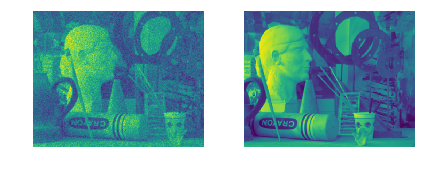

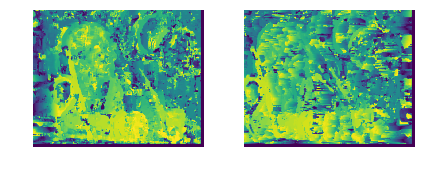

Stereo image pair with increased contrast(10%) in left image and resulting disparity maps:


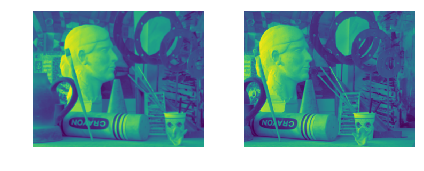

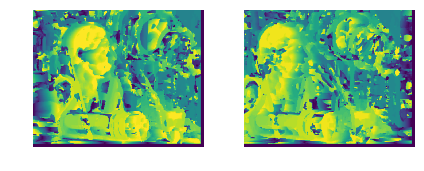

In [5]:
def ps2_3():
    L = util.read_img_gray_mode('pair1-L.png')
    R = util.read_img_gray_mode('pair1-R.png')

    if use_subsampling: (L, R) = util.downsample([L, R])
        
    # convert to [0,1] scale        
    L = L * (1.0 / 255.0)
    R = R * (1.0 / 255.0)
    
    noise = np.random.normal(scale = .1, size = L.shape)
    L_n = L + noise
    L_c = L * 1.1
    
    # compute disparity maps using ssd template matching
    ts = 7; dr = 100
    D_L_n = np.abs(disparity_ssd(L_n, R, template_size=ts, disparity_range=dr))
    D_R_n = np.abs(disparity_ssd(R, L_n, template_size=ts, disparity_range=dr))
    D_L_c = np.abs(disparity_ssd(L_c, R, template_size=ts, disparity_range=dr))
    D_R_c = np.abs(disparity_ssd(R, L_c, template_size=ts, disparity_range=dr))
    
    (L_n, L_c, D_L_n, D_R_n, D_L_c, D_R_c) = util.normalize([L_n, L_c, D_L_n, D_R_n, D_L_c, D_R_c], 0, 255)
    
    if use_subsampling: 
        (L_n, L_c, D_L_n, D_R_n, D_L_c, D_R_c) = util.upsample([L_n, L_c, D_L_n, D_R_n, D_L_c, D_R_c])
        
    util.write_img('pair1-L-noisy.png', L_n)
    util.write_img('ps2-3-a-1.png', D_L_n)
    util.write_img('ps2-3-a-2.png', D_R_n)
    util.write_img('pair1-L-contrast.png', L_c)
    util.write_img('ps2-3-b-1.png', D_L_c)
    util.write_img('ps2-3-b-2.png', D_R_c)
    
    print('''Perturbations in SSD template matching due to noise Input stereo image pair with noisy 
          left image and resulting disparity maps:''')
    util.show_images_together(L_n, R)
    util.show_images_together(D_L_n, D_R_n)
    print('Stereo image pair with increased contrast(10%) in left image and resulting disparity maps:')
    util.show_images_together(L_c, R)
    util.show_images_together(D_L_c, D_R_c)
    
ps2_3()

Stereo correspondence using Normalized Correlation Input stereo image pair in grayscale:


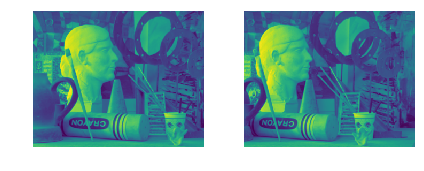

Disparity maps of the stereo image pair using normalized correlation template matching:


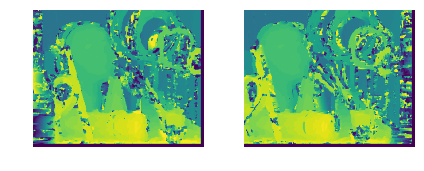

Disparity maps of noisy stereo image pairs using normalized correlation template matching:


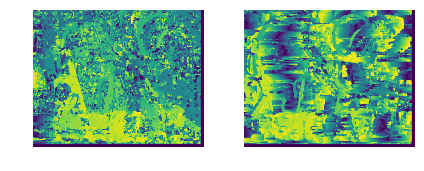

Disparity maps of contrast-bossted stereo image pair using normalized correlation template matching:


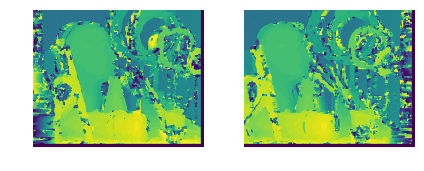

In [6]:
def ps2_4():
    L = util.read_img_gray_mode('pair1-L.png')
    R = util.read_img_gray_mode('pair1-R.png')

    if use_subsampling: (L, R) = util.downsample([L, R])
        
    # convert to [0,1] scale        
    L = L * (1.0 / 255.0)
    R = R * (1.0 / 255.0)
    
    noise = np.random.normal(scale = .1, size = L.shape)
    L_n = L + noise # add noise to left image
    L_c = L * 1.1 # increase contrast by 10% of left image
    
    ts = 7; dr = 100
    D_L = np.abs(disparity_ncorr(L, R, template_size=ts, disparity_range=dr))
    D_R = np.abs(disparity_ncorr(R, L, template_size=ts, disparity_range=dr))
    D_L_n = np.abs(disparity_ncorr(L_n, R, template_size=ts, disparity_range=dr))
    D_R_n = np.abs(disparity_ncorr(R, L_n, template_size=ts, disparity_range=dr))
    D_L_c = np.abs(disparity_ncorr(L_c, R, template_size=ts, disparity_range=dr))
    D_R_c = np.abs(disparity_ncorr(R, L_c, template_size=ts, disparity_range=dr))
    
    (D_L, D_R, D_L_n, D_R_n, D_L_c, D_R_c) = util.normalize([D_L, D_R, D_L_n, D_R_n, D_L_c, D_R_c], 0, 255)
    
    #  revert dimensions by upsampling if previously downsampled
    if use_subsampling:
        (D_L, D_R, D_L_n, D_R_n, D_L_c, D_R_c) = util.upsample([D_L, D_R, D_L_n, D_R_n, D_L_c, D_R_c])
        
    # save disparity maps
    util.write_img('ps2-4-a-1.png', D_L)
    util.write_img('ps2-4-a-2.png', D_R)
    util.write_img('ps2-4-b-1.png', D_L_n)
    util.write_img('ps2-4-b-2.png', D_R_n)
    util.write_img('ps2-4-b-3.png', D_L_c)
    util.write_img('ps2-4-b-4.png', D_R_c)
    
    print('Stereo correspondence using Normalized Correlation Input stereo image pair in grayscale:')
    util.show_images_together(L, R)
    print('Disparity maps of the stereo image pair using normalized correlation template matching:')
    util.show_images_together(D_L, D_R)
    print('Disparity maps of noisy stereo image pairs using normalized correlation template matching:')
    util.show_images_together(D_L_n, D_R_n)
    print('Disparity maps of contrast-boosted stereo image pair using normalized correlation template matching:')
    util.show_images_together(D_L_c, D_R_c)

ps2_4()

In [7]:
def ps2_5():
    pass

ps2_5()